# **Film-O-Meter**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("/content/bollywoodboxoffice_raw.csv")
data.head()

,movie_name,movie_url,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_movierelease,movie_director,movie_director_url,movie_banner,movie_producer,movie_stars,movie_details
0,Angrezi Medium,https://www.bollywoodmdb.com/movies/hindi-medi...,: 4.03 cr,: 9.03 cr,: 9.36 cr,: 9.36 cr,: 13.50 cr,"Drama, Comedy","13 March, 2020 | 2 hrs 25 mins",Homi Adajania,https://www.bollywoodmdb.com/celebrities/homi-...,"Banner : Maddock Films, Jio Studios","Producer : Dinesh Vijan , Jyoti Deshpande","Star : Irrfan Khan , Radhika Madan, Kareena Ka...",When his daughter decides to further her studi...
1,Baaghi 3,https://www.bollywoodmdb.com/movies/baaghi-3/1...,: 17.50 cr,: 53.83 cr,: 90.67 cr,: 93.37 cr,: 137 cr,Action,"06 March, 2020 | 2 hrs 27 mins",Ahmed Khan,https://www.bollywoodmdb.com/celebrities/ahmed...,"Banner : Nadiadwala Grandson Entertainment, Fo...",Producer : Sajid Nadiadwala,"Star : Tiger Shroff , Shraddha Kapoor, Riteish...",A man embarks on a bloody rampage to save his ...
2,Thappad,https://www.bollywoodmdb.com/movies/thappad/16643,: 3.07 cr,: 14.66 cr,: 22.79 cr,: 30.61 cr,: 44.50 cr,"Drama, Social","28 February, 2020 | 2 hrs 22 mins",Anubhav Sinha,https://www.bollywoodmdb.com/celebrities/anubh...,"Banner : Benaras Media Works, T-Series Super C...","Producer : Bhushan Kumar , Krishan Kumar, Anub...","Star : Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...
3,Shubh Mangal Zyada Saavdhan,https://www.bollywoodmdb.com/movies/shubh-mang...,: 9.55 cr,: 32.66 cr,: 44.84 cr,: 62.78 cr,: 86.39 cr,"Comedy, Romance","21 February, 2020 | 2 hrs",Hitesh Kewalya,https://www.bollywoodmdb.com/celebrities/hites...,"Banner : Colour Yellow Productions Pvt Ltd, T-...","Producer : Aanand L Rai , Himanshu Sharma, Bhu...","Star : Ayushman Khurana , Jitendra Kumar, Gajr...",The road to achieving a happy ending is a litt...
4,Bhoot: Part One - The Haunted Ship,https://www.bollywoodmdb.com/movies/bhoot-part...,: 5.10 cr,: 16.36 cr,: 24.18 cr,: 31.97 cr,: 40.94 cr,Horror,"21 February, 2020 | 1 hrs 57 mins",Bhanu Pratap Singh,https://www.bollywoodmdb.com/celebrities/bhanu...,"Banner : Dharma Productions, Zee Studios","Producer : Hiroo Johar , Karan Johar, Apoorva ...","Star : Vicky Kaushal , Bhumi Pednekar, Ashutos...",A couple is trapped on an abandoned ship lying...


# Data Preprocessing
* Data Cleaning ✅
* Aggregation ❎
* Sampling ❎
* Dimensionality reduction ✅
* Feature subset selection ❎
* Feature creation ✅
* Discretization and binarization ✅
* Variable transformation ❎



Dimensionality Reduction

In [ ]:
# Create a copy of the original DataFrame to preserve the raw data
df1 = data.copy()

# Drop columns that contain URL links, as they are not required for analysis
df1.drop(['movie_url','movie_director_url','movie_details'], axis=1, inplace=True)

# axis=1 means you're dropping columns (use axis=0 for rows).
# inplace=True updates df directly. Otherwise, you’d need to assign it: df = df.drop(...)

Feature Creation

In [ ]:
# Split into date and time parts based on " | " delimiter: expand=True split the string into multiple columns
df1[['date_part', 'time_part']] = df1['movie_movierelease'].str.split(" \| ", expand=True)
# Extract day, month, year from date_part
df1['day'] = df1['date_part'].str.extract(r"(\d{1,2})") # Extract (1 or 2 digits) using regex
df1['month'] = df1['date_part'].str.extract(r"\d{1,2} (\w+),")[0] # Extract (after day, before comma) using regex
df1['year'] = df1['date_part'].str.extract(r", (\d{4})") # Extract the 4-digit year
# Convert runtime to minutes
def convert_runtime_to_minutes(runtime_str):
    parts = runtime_str.strip().split()
    hours = int(parts[0]) if 'hrs' in parts else 0
    mins = int(parts[2]) if len(parts) > 2 else 0
    return hours * 60 + mins
df1['runtime'] = df1['time_part'].apply(convert_runtime_to_minutes)
df1.drop(['movie_movierelease', 'date_part', 'time_part'], axis=1, inplace=True)

print(df1['runtime'].unique())

df1['runtime'] = df1['runtime'].apply(lambda x: 'Short' if x < 120 else 'Long')  # categorize runtime

[145 147 142 120 117 141 134 119 129 144 123 163 106 128 162 133 137 149
 170 156 153 124 132 146 171 121 154 131 175 103 155 135 111 168 115 150
 126 130 148 139 112 138 159 158  93 165 140 113 122 136 157 160 125 101
  98 116 161 107 151]


Data Cleaning

In [ ]:
'''Regex (Regular Expression) is a powerful tool used for searching, matching, and manipulating strings based on patterns.
It enables you to search for specific patterns, validate inputs, extract data, and replace text within strings.
Regex uses a sequence of special characters and operators, such as *, +, [], \d, and others, to define patterns.'''

columns_to_clean = ["movie_opening", "movie_weekend", "movie_firstweek", "movie_total", "movie_total_worldwide"]
# Clean the specified columns by removing unwanted characters and standardizing missing values
for col in columns_to_clean:
    df1[col] = df1[col].str.replace(": ", "", regex=False)
    df1[col] = df1[col].str.replace(" cr", "", regex=False)
    df1[col] = df1[col].str.replace("---", "0", regex=False) # Replace placeholders for missing data with "0"

df1["movie_banner"]=df1["movie_banner"].str.replace("Banner : ", "", regex=False)
df1["movie_producer"]=df1["movie_producer"].str.replace("Producer : ", "", regex=False)
df1["movie_stars"]=df1["movie_stars"].str.replace("Star : ", "", regex=False)
# regex=False tells pandas to treat " cr" as a literal string, not a regular expression.


In [ ]:
for col in columns_to_clean:
    print(f"\nChecking column: {col}")
    mask = pd.to_numeric(df1[col], errors='coerce').isna()
    non_integers = df1[mask]
    print(non_integers[[col]])


Checking column: movie_opening
Empty DataFrame
Columns: [movie_opening]
Index: []

Checking column: movie_weekend
Empty DataFrame
Columns: [movie_weekend]
Index: []

Checking column: movie_firstweek
Empty DataFrame
Columns: [movie_firstweek]
Index: []

Checking column: movie_total
    movie_total
105      03.00*

Checking column: movie_total_worldwide
Empty DataFrame
Columns: [movie_total_worldwide]
Index: []


In [ ]:
# Changing Data Types from String to Numeric
df1['movie_total'] = df1['movie_total'].str.replace("*", "", regex=False)
df1['movie_opening'] = pd.to_numeric(df1['movie_opening'], errors='coerce')
df1['movie_weekend'] = pd.to_numeric(df1['movie_weekend'], errors='coerce')
df1['movie_firstweek'] = pd.to_numeric(df1['movie_firstweek'], errors='coerce')
df1['movie_total'] = pd.to_numeric(df1['movie_total'], errors='coerce')
df1['movie_total_worldwide'] = pd.to_numeric(df1['movie_total_worldwide'], errors='coerce')


In [ ]:
df1.isna().any()

,0
movie_name,False
movie_opening,False
movie_weekend,False
movie_firstweek,False
movie_total,False
movie_total_worldwide,False
movie_genre,True
movie_director,False
movie_banner,False
movie_producer,True


In [ ]:
# Fill Missing Categorical Values with 'Unknown'
df1['movie_genre'].fillna('Unknown', inplace=True)
df1['movie_producer'].fillna('Unknown', inplace=True)
df1['movie_stars'].fillna('Unknown', inplace=True)

# Convert all specified columns to lowercase to avoid case sensitivity issues
df1['movie_genre']=df1['movie_genre'].str.lower()
df1['movie_producer']=df1['movie_producer'].str.lower()
df1['movie_stars']=df1['movie_stars'].str.lower()
df1['movie_banner']=df1['movie_banner'].str.lower()


<ipython-input-105-aa07d5355a3b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['movie_genre'].fillna('Unknown', inplace=True)
<ipython-input-105-aa07d5355a3b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
print(df1.shape)
df1.drop_duplicates(inplace=True)
df1

(130, 15)


,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,movie_banner,movie_producer,movie_stars,day,month,year,runtime
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"drama, comedy",Homi Adajania,"maddock films, jio studios","dinesh vijan , jyoti deshpande","irrfan khan , radhika madan, kareena kapoor",13,March,2020,Long
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,action,Ahmed Khan,"nadiadwala grandson entertainment, fox star st...",sajid nadiadwala,"tiger shroff , shraddha kapoor, riteish deshmukh",06,March,2020,Long
2,Thappad,3.07,14.66,22.79,30.61,44.50,"drama, social",Anubhav Sinha,"benaras media works, t-series super cassettes ...","bhushan kumar , krishan kumar, anubhav sinha","taapsee pannu , pavail gulati, dia mirza",28,February,2020,Long
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"comedy, romance",Hitesh Kewalya,"colour yellow productions pvt ltd, t-series su...","aanand l rai , himanshu sharma, bhushan kumar","ayushman khurana , jitendra kumar, gajraj rao",21,February,2020,Long
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,horror,Bhanu Pratap Singh,"dharma productions, zee studios","hiroo johar , karan johar, apoorva mehta","vicky kaushal , bhumi pednekar, ashutosh rana",21,February,2020,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Bhoomi,2.25,7.48,10.28,10.63,15.68,drama,Omung Kumar,"t-series super cassettes industries ltd., lege...","sandeep singh , bhushan kumar, krishan kumar","sanjay dutt , aditi rao hydari, sharad kelkar",22,September,2017,Long
126,Haseena Parkar,1.87,6.10,8.00,8.03,9.00,"biographical, crime",Apoorva Lakhia,swiss entertainment pvt. ltd.,nahid khan,"shraddha kapoor , siddhanth kapoor, ankur bhatia",22,September,2017,Long
127,Lucknow Central,2.04,8.42,10.42,11.20,16.95,thriller,Ranjit Tiwari,"viacom18 motion pictures, emmay entertainment ...","monisha advani , nikhil advani, viacom18 motio...","farhan akhtar , diana penty, deepak dobriyal",15,September,2017,Long
128,Simran,2.77,10.65,15.48,17.26,27.69,drama,Hansal Mehta,"t-series super cassettes industries ltd., karm...","bhushan kumar , shailesh r. singh, amit agarwal","kangana ranaut , sohum shah, rupinder nagra",15,September,2017,Long


In [ ]:
df1['movie_opening'] = pd.to_numeric(df1['movie_opening'], errors='coerce')
df1['movie_weekend'] = pd.to_numeric(df1['movie_weekend'], errors='coerce')
df1['movie_firstweek'] = pd.to_numeric(df1['movie_firstweek'], errors='coerce')
df1['movie_total'] = pd.to_numeric(df1['movie_total'], errors='coerce')
df1['movie_total_worldwide'] = pd.to_numeric(df1['movie_total_worldwide'], errors='coerce')

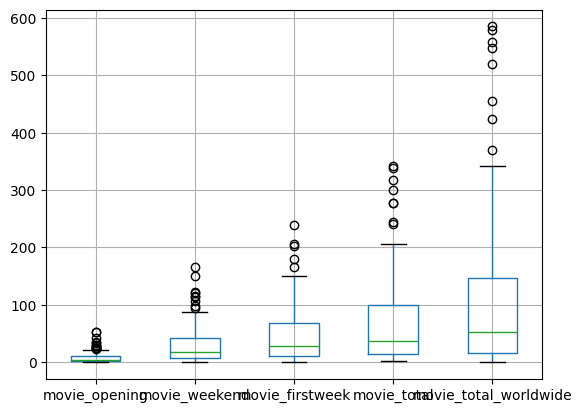

In [ ]:
df1.boxplot()
plt.show()

In [ ]:
outliers_col = ["movie_opening", "movie_weekend", "movie_firstweek", "movie_total", "movie_total_worldwide"]
for col in outliers_col:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\nColumn: {col}")
    #Identify outliers
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    print("Mode value: ",df1[col].mode()[0]) # ensures only the most frequent value is printed (may return multiple values)
    print("Outlier values:")
    print(outliers[[col]])


Column: movie_opening
Mode value:  2.7
Outlier values:
     movie_opening
14           24.50
26           53.35
31           24.40
33           29.16
40           42.30
71           52.25
83           25.25
90           34.75
91           29.17
100          25.10
109          24.00
113          34.10
120          30.14

Column: movie_weekend
Mode value:  4.95
Outlier values:
     movie_weekend
26          166.25
33           97.56
40          150.10
67           95.00
71          123.00
90          120.06
91          106.47
109         114.00
113         114.93

Column: movie_firstweek
Mode value:  0.0
Outlier values:
     movie_firstweek
26            238.35
40            180.05
90            202.51
109           166.50
113           206.04

Column: movie_total
Mode value:  12.0
Outlier values:
     movie_total
11        276.90
26        318.01
38        278.24
62        244.06
63        240.22
90        341.22
109       300.26
113       339.16

Column: movie_total_worldwide
Mode val

Rules

In [ ]:
Rule1 = df1['movie_name'].duplicated(keep=False)
Rule2 = df1['movie_firstweek'] >= df1['movie_opening']
Rule3 = df1['movie_total'] >= df1[['movie_weekend', 'movie_firstweek']].max(axis=1)
Rule4 = df1['movie_total_worldwide'] >= df1['movie_total']

data = {'Rule1': ~Rule1, 'Rule2': Rule2, 'Rule3': Rule3, 'Rule4': Rule4}
Rules = pd.DataFrame(data)
Rules


,Rule1,Rule2,Rule3,Rule4
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
125,True,True,True,True
126,True,True,True,True
127,True,True,True,True
128,True,True,True,True


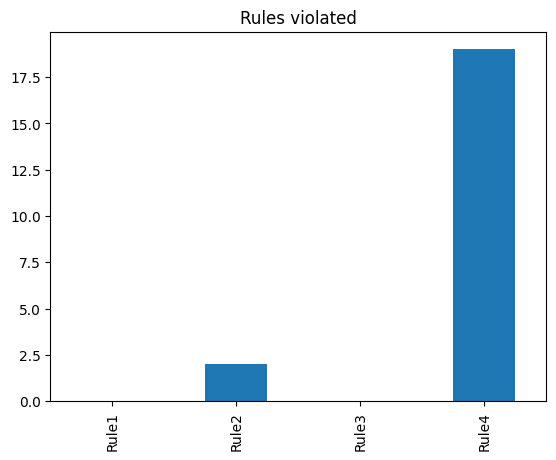

In [ ]:
Violated_rules = 130 - Rules.astype(int).sum()
Violated_rules.plot.bar()
plt.title("Rules violated")
plt.show()

In [ ]:
violated_rows = df1[df1['movie_firstweek'] < df1['movie_opening']]
violated_rows[['movie_name', 'movie_firstweek', 'movie_opening']]

,movie_name,movie_firstweek,movie_opening
25,Sye Raa Narasimha Reddy,0.0,2.60
34,Jabariya Jodi,0.0,3.15


In [ ]:
violated_rows = df1[df1['movie_total_worldwide'] < df1['movie_total']]
violated_rows[['movie_name', 'movie_total_worldwide', 'movie_total']]


,movie_name,movie_total_worldwide,movie_total
7,Shikara,0.00,7.95
21,Ujda Chaman,0.00,12.00
25,Sye Raa Narasimha Reddy,0.00,2.60
27,Pal Pal Dil Ke Paas,0.00,4.80
29,Dream Girl,128.24,139.70
34,Jabariya Jodi,0.00,12.00
45,Blank,0.00,5.15
47,The Tashkent Files,0.00,16.75
53,Sonchiriya,0.00,6.55
56,Amavas,0.00,2.85


In [ ]:
df1.loc[df1['movie_firstweek'] < df1['movie_opening'], 'movie_firstweek'] = df1['movie_opening']
df1.loc[df1['movie_total_worldwide'] < df1['movie_total'], 'movie_total_worldwide'] = df1['movie_total']
df1['movie_total_worldwide'].unique()

array([ 13.5 , 137.  ,  44.5 ,  86.39,  40.94,  52.6 ,  76.3 ,   7.95,
        43.83,  41.58,  95.7 , 341.  ,  55.38, 304.71, 212.87,  66.86,
       115.56,  49.29,  40.15,  65.34, 169.67,  12.  , 279.11,  30.63,
        34.41,   2.6 , 455.  ,   4.8 ,  22.3 , 139.7 , 170.99, 424.  ,
       113.49, 239.83,  44.92, 184.97,  90.15, 369.58,  11.06, 314.68,
        23.  ,  14.23, 129.25,  96.06,   5.15, 121.96,  16.75,  53.33,
        32.53, 173.97, 130.12, 122.84,   6.55, 152.19, 222.72,   2.85,
        36.78, 129.74,  31.6 ,   8.65,  31.84, 260.86, 317.61,  43.93,
       170.12,  95.36, 520.  ,   6.25,   2.5 ,   1.8 , 251.84,  28.02,
       180.  ,  13.48,  71.74, 100.  ,   7.64,  44.63,  39.93,  14.7 ,
       150.18,  27.85, 149.5 , 106.67,  16.55,  26.28,  22.87, 109.88,
        38.14, 579.  , 300.04,  88.64,  70.82, 183.87,  77.82,   4.  ,
         4.09,  54.23,  28.6 , 251.31,  75.76, 142.73,  26.  ,  40.31,
       148.48,  29.23, 120.56, 585.  ,  23.4 ,   6.5 ,  13.  , 558.  ,
      

In [ ]:
df1['box_office_label'] = df1['movie_total_worldwide'].apply(
    lambda x: 'Flop' if x < 50 else ('Hit' if x <= 100 else ('Super Hit' if x <= 200 else'Blockbuster')))
df1.drop(['movie_total_worldwide'], axis=1, inplace=True)

In [ ]:
df1.head()

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_genre,movie_director,movie_banner,movie_producer,movie_stars,day,month,year,runtime,box_office_label
0,Angrezi Medium,4.03,9.03,9.36,9.36,"drama, comedy",Homi Adajania,"maddock films, jio studios","dinesh vijan , jyoti deshpande","irrfan khan , radhika madan, kareena kapoor",13,March,2020,Long,Flop
1,Baaghi 3,17.50,53.83,90.67,93.37,action,Ahmed Khan,"nadiadwala grandson entertainment, fox star st...",sajid nadiadwala,"tiger shroff , shraddha kapoor, riteish deshmukh",06,March,2020,Long,Super Hit
2,Thappad,3.07,14.66,22.79,30.61,"drama, social",Anubhav Sinha,"benaras media works, t-series super cassettes ...","bhushan kumar , krishan kumar, anubhav sinha","taapsee pannu , pavail gulati, dia mirza",28,February,2020,Long,Flop
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,"comedy, romance",Hitesh Kewalya,"colour yellow productions pvt ltd, t-series su...","aanand l rai , himanshu sharma, bhushan kumar","ayushman khurana , jitendra kumar, gajraj rao",21,February,2020,Long,Hit
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,horror,Bhanu Pratap Singh,"dharma productions, zee studios","hiroo johar , karan johar, apoorva mehta","vicky kaushal , bhumi pednekar, ashutosh rana",21,February,2020,Short,Flop


# Association 1

In [ ]:
!pip install efficient-apriori

In [ ]:
a1 = df1[['day','month','movie_opening']]

a1['movie_opening'] = a1['movie_opening'].apply(
    lambda x: 'Flop' if x < 5 else ('Hit' if x <= 13 else ('Super Hit' if x <= 20 else'Blockbuster')))

transactions = list(map(lambda x: list(x), a1.values))
transactions[:5]

<ipython-input-118-2692e99607ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['movie_opening'] = a1['movie_opening'].apply(


[['13', 'March', 'Flop'],
 ['06', 'March', 'Super Hit'],
 ['28', 'February', 'Flop'],
 ['21', 'February', 'Hit'],
 ['21', 'February', 'Hit']]

In [ ]:
from efficient_apriori import apriori

df1['headstart'] = None
categories = ['Flop', 'Hit', 'Super Hit', 'Blockbuster']
itemsets, rules = apriori(transactions, min_support=0.005, min_confidence=1)

for rule in rules:
    total_items = len(rule.lhs) + len(rule.rhs)
    if total_items == 3:
        if len(rule.rhs) == 1 and list(rule.rhs)[0] in categories:
            print('{',list(rule.lhs)[0],",",list(rule.lhs)[1],'} -> {',list(rule.rhs)[0],'}')
            # Apply the rule to the matching rows in the DataFrame
            df1.loc[(df1['day'] == list(rule.lhs)[0]) & (df1['month'] == list(rule.lhs)[1]), 'headstart'] = list(rule.rhs)[0]

df1.drop(['day','month'], axis=1, inplace=True)

{ 01 , December } -> { Flop }
{ 01 , February } -> { Flop }
{ 01 , November } -> { Flop }
{ 01 , June } -> { Hit }
{ 02 , March } -> { Flop }
{ 03 , August } -> { Flop }
{ 03 , May } -> { Flop }
{ 03 , November } -> { Flop }
{ 04 , May } -> { Flop }
{ 05 , April } -> { Hit }
{ 05 , June } -> { Blockbuster }
{ 05 , October } -> { Flop }
{ 06 , April } -> { Flop }
{ 06 , October } -> { Flop }
{ 06 , September } -> { Hit }
{ 06 , March } -> { Super Hit }
{ 07 , December } -> { Hit }
{ 08 , December } -> { Hit }
{ 08 , February } -> { Flop }
{ 08 , September } -> { Flop }
{ 08 , March } -> { Hit }
{ 09 , August } -> { Flop }
{ 09 , February } -> { Hit }
{ 09 , March } -> { Flop }
{ 10 , November } -> { Flop }
{ 10 , May } -> { Hit }
{ 11 , October } -> { Flop }
{ 11 , May } -> { Hit }
{ 12 , April } -> { Flop }
{ 12 , January } -> { Flop }
{ 12 , October } -> { Flop }
{ 12 , July } -> { Hit }
{ 13 , April } -> { Hit }
{ 13 , December } -> { Flop }
{ 13 , July } -> { Flop }
{ 13 , March } -

In [ ]:
Rule1 = df1['box_office_label'] == df1['headstart']
Rule2 = df1['headstart'].isna()
data={"Rule1":Rule,"Rule2":~Rule2}
Rules = pd.DataFrame(data)

correct_predictions = Rules['Rule1'].sum()
no_prediction = Rule2.sum()
total_predictions = (~Rule2).sum()
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f"✅ Correct Predictions: {correct_predictions}")
print(f"❌ No Prediction Made: {no_prediction}")
print(f"📊 Total Predictions: {total_predictions}")
print(f"🎯 Accuracy: {accuracy:.2%}")

✅ Correct Predictions: 65
❌ No Prediction Made: 39
📊 Total Predictions: 91
🎯 Accuracy: 71.43%


In [ ]:
df1.head()

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_genre,movie_director,movie_banner,movie_producer,movie_stars,year,runtime,box_office_label,headstart
0,Angrezi Medium,4.03,9.03,9.36,9.36,"drama, comedy",Homi Adajania,"maddock films, jio studios","dinesh vijan , jyoti deshpande","irrfan khan , radhika madan, kareena kapoor",2020,Long,Flop,Flop
1,Baaghi 3,17.50,53.83,90.67,93.37,action,Ahmed Khan,"nadiadwala grandson entertainment, fox star st...",sajid nadiadwala,"tiger shroff , shraddha kapoor, riteish deshmukh",2020,Long,Super Hit,Super Hit
2,Thappad,3.07,14.66,22.79,30.61,"drama, social",Anubhav Sinha,"benaras media works, t-series super cassettes ...","bhushan kumar , krishan kumar, anubhav sinha","taapsee pannu , pavail gulati, dia mirza",2020,Long,Flop,Flop
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,"comedy, romance",Hitesh Kewalya,"colour yellow productions pvt ltd, t-series su...","aanand l rai , himanshu sharma, bhushan kumar","ayushman khurana , jitendra kumar, gajraj rao",2020,Long,Hit,Hit
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,horror,Bhanu Pratap Singh,"dharma productions, zee studios","hiroo johar , karan johar, apoorva mehta","vicky kaushal , bhumi pednekar, ashutosh rana",2020,Short,Flop,Hit


# Association 2

In [ ]:
a2 = df1[['box_office_label','year','movie_genre']].copy()

def split_genres(row):
    genres = [g.strip().lower() for g in row['movie_genre'].split(',') if g.strip().lower() != 'unknown']
    return genres + [str(row['year']), row['box_office_label']]

transactions = a2.apply(split_genres, axis=1).tolist()
transactions[:5]

[['drama', 'comedy', '2020', 'Flop'],
 ['action', '2020', 'Super Hit'],
 ['drama', 'social', '2020', 'Flop'],
 ['comedy', 'romance', '2020', 'Hit'],
 ['horror', '2020', 'Flop']]

In [ ]:
from efficient_apriori import apriori

df1['preference'] = False
categories = ['Flop', 'Hit', 'Super Hit', 'Blockbuster']
itemsets, rules = apriori(transactions, min_support=0.005, min_confidence=1)

for rule in rules:
    rhs = list(rule.rhs)
    lhs = list(rule.lhs)
    total_items = len(lhs) + len(rhs)

    if total_items <= 3 and len(rhs) == 1 and rhs[0] in categories:
        genre_matches = [g for g in lhs if g not in categories and not g.isdigit()]
        year_matches = [y for y in lhs if y.isdigit()]

        # Apply only if: At least two genres, OR One or more genres + a year
        if len(genre_matches) >= 2 or (len(genre_matches) >= 1 and len(year_matches) >= 1):
            lhs_str = ', '.join(map(str, lhs))
            print(f"{{{lhs_str}}} -> {{{rhs[0]}}}")

            genre_mask = df1['movie_genre'].str.lower().apply(
                lambda x: all(g in x for g in genre_matches))
            if year_matches:
                for year in year_matches:
                    year_mask = df1['year'].astype(str) == year
                    df1.loc[genre_mask & year_mask, 'preference'] = True
            else:
                df1.loc[genre_mask, 'preference'] = True

df1.drop(['movie_genre','year'], axis=1, inplace=True)

{2017, action} -> {Blockbuster}
{2017, musical} -> {Blockbuster}
{2017, biographical} -> {Flop}
{2017, crime} -> {Flop}
{2017, romance} -> {Flop}
{2018, adventure} -> {Blockbuster}
{2018, historical} -> {Blockbuster}
{2018, sci-fi} -> {Blockbuster}
{2018, sports} -> {Flop}
{2018, suspense} -> {Hit}
{2019, musical} -> {Blockbuster}
{2019, historical} -> {Flop}
{2019, horror} -> {Flop}
{2019, mystery} -> {Flop}
{2019, social} -> {Flop}
{2019, spy} -> {Hit}
{2020, historical} -> {Blockbuster}
{2020, horror} -> {Flop}
{2020, social} -> {Flop}
{2020, sports} -> {Flop}
{2020, dance} -> {Hit}
{action, adventure} -> {Blockbuster}
{action, sci-fi} -> {Blockbuster}
{drama, historical} -> {Blockbuster}
{drama, musical} -> {Blockbuster}
{biographical, crime} -> {Flop}
{biographical, sports} -> {Flop}
{comedy, crime} -> {Flop}
{comedy, thriller} -> {Flop}
{crime, drama} -> {Flop}
{drama, mystery} -> {Flop}
{drama, sports} -> {Flop}
{historical, war} -> {Flop}
{horror, thriller} -> {Flop}
{mystery, 

In [ ]:
TP = ((df1['box_office_label'] != 'Flop') & (df1['preference'] == True)).sum()
FP = ((df1['box_office_label'] == 'Flop') & (df1['preference'] == True)).sum()
TN = ((df1['box_office_label'] == 'Flop') & (df1['preference'] == False)).sum()
FN = ((df1['box_office_label'] != 'Flop') & (df1['preference'] == False)).sum()

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("📊 Confusion Matrix:")
print("TP  : ",TP," ;   FN  : ",FN)
print("FP  : ",FP," ;   TN  : ",TN)
print()
print(f"🎯 Accuracy:  {accuracy:.2%}")
print(f"🎯 Precision: {precision:.2%}")
print(f"🎯 Recall:    {recall:.2%}")
print(f"🎯 F1 Score:  {f1_score:.2%}")

📊 Confusion Matrix:
TP  :  14  ;   FN  :  54
FP  :  15  ;   TN  :  47

🎯 Accuracy:  46.92%
🎯 Precision: 48.28%
🎯 Recall:    20.59%
🎯 F1 Score:  28.87%


# Decision Tree and K-Nearest Neighbors Classification

Use of LabelEncoder:
* LabelEncoder converts categorical text values into numerical labels.
* This is necessary because machine learning models in scikit-learn don’t work directly with strings — they need numbers.
* The label_encoders dictionary helps you keep track of each encoder, which is useful for:
* Transforming new input data before prediction.
* Decoding predictions back to original labels (like 'Flop', 'Hit').

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_dt = df1.copy()
df_dt = df_dt.drop(['movie_name', 'headstart', 'preference'], axis=1)

#Initialize a dictionary to store LabelEncoders for each column
label_encoders = {}
for col in df_dt.columns:
    # Check if the column's data type is 'object' (i.e., text/string)
    if df_dt[col].dtype == 'object':
        # Create a LabelEncoder instance
        le = LabelEncoder()
        # Fit the encoder on the column's values and transform them to integers
        df_dt[col] = le.fit_transform(df_dt[col])
        # Store the encoder in the dictionary so we can reverse the encoding later if needed
        label_encoders[col] = le

X = df_dt.drop('box_office_label', axis=1)
y = df_dt['box_office_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

deci_tree = DecisionTreeClassifier()
deci_tree.fit(X_train, y_train)
prediction_deci = deci_tree.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)

print("Decision Tree Predictions:", prediction_deci)
print("KNN Predictions:", prediction_knn)

print("\nConfusion Matrix of Decision Tree:")
print(confusion_matrix(y_test, prediction_deci))
print("\nConfusion Matrix of KNN:")
print(confusion_matrix(y_test, prediction_knn))

print("\nModel Performance Comparison:\n")

acc_knn = accuracy_score(y_test, prediction_knn)
acc_dt = accuracy_score(y_test, prediction_deci)
report_knn = classification_report(y_test, prediction_knn, output_dict=True)
report_dt = classification_report(y_test, prediction_deci, output_dict=True)
df_knn = pd.DataFrame(report_knn).transpose()
df_dt = pd.DataFrame(report_dt).transpose()

comparison_df = df_knn[['precision', 'recall', 'f1-score']].rename(
    columns=lambda x: f"KNN_{x}")
comparison_df = comparison_df.join(df_dt[['precision', 'recall', 'f1-score']].rename(
    columns=lambda x: f"DT_{x}"))

comparison_df.loc['accuracy'] = [acc_knn, acc_knn, acc_knn, acc_dt, acc_dt, acc_dt]
print(comparison_df.round(2))

Decision Tree Predictions: [3 1 2 1 1 1 2 3 3 2 0 1 1 2 1 0 2 3 1 0 3 2 3 0 3 1]
KNN Predictions: [2 1 1 1 1 1 1 3 3 2 0 1 1 3 1 3 1 2 1 0 3 3 3 0 3 1]

Confusion Matrix of Decision Tree:
[[4 0 1 1]
 [0 8 2 0]
 [0 1 2 0]
 [0 0 1 6]]

Confusion Matrix of KNN:
[[ 3  0  1  2]
 [ 0 10  0  0]
 [ 0  2  0  1]
 [ 0  0  2  5]]

Model Performance Comparison:

              KNN_precision  KNN_recall  KNN_f1-score  DT_precision  \
0                      1.00        0.50          0.67          1.00   
1                      0.83        1.00          0.91          0.89   
2                      0.00        0.00          0.00          0.33   
3                      0.62        0.71          0.67          0.86   
accuracy               0.69        0.69          0.69          0.77   
macro avg              0.61        0.55          0.56          0.77   
weighted avg           0.72        0.69          0.68          0.84   

              DT_recall  DT_f1-score  
0                  0.67         0.80  
1

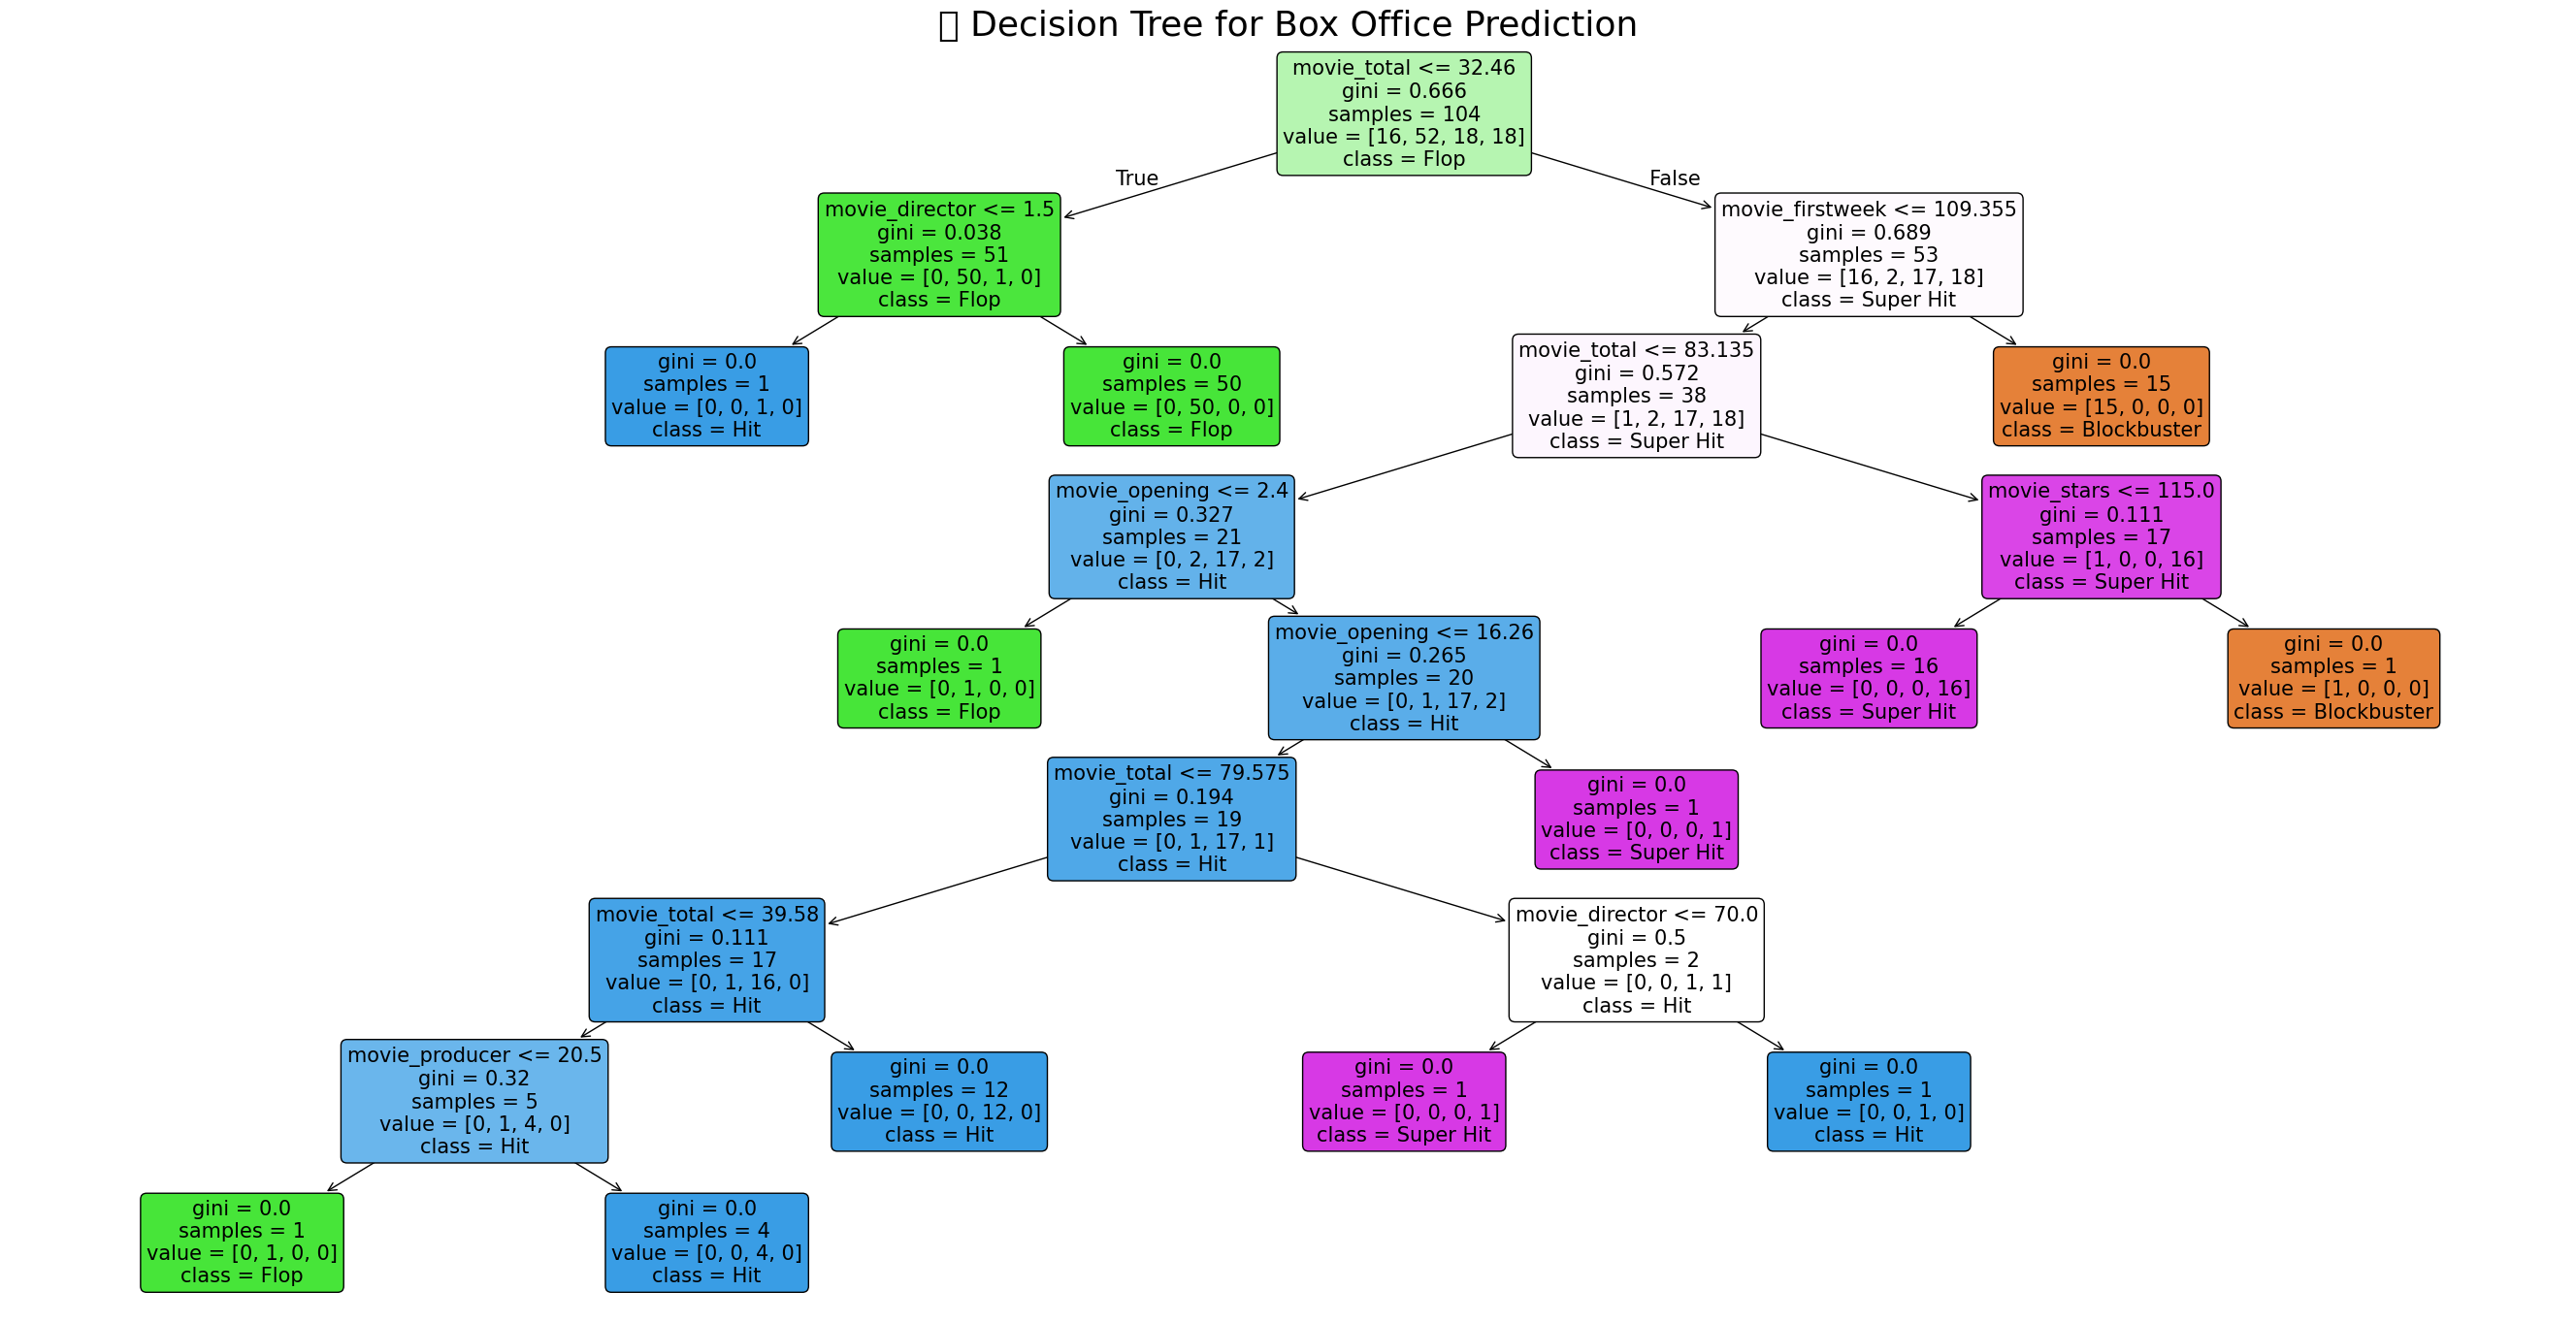

In [ ]:
from sklearn import tree
plt.figure(figsize=(34,17))

tree.plot_tree(
    deci_tree, feature_names=X.columns,  # Use your actual feature column names
    class_names=label_encoders['box_office_label'].classes_,  # Decoded class names
    filled=True, rounded=True,fontsize=15)

plt.title("🎬 Decision Tree for Box Office Prediction", fontsize=26)
plt.show()
